# Homework 2: MNIST Dataset
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

---------------------------
# Soru 1
Bu problemde L2 düzenlileştirilmesi ne işe yaramaktadır? Buradaki, γ hiperparametresinin artışı ve azalışı teorik açıdan ne sağlamaktadır? Araştırarak raporlayınız.

* Regularization modelin overfitting olmaması için coefficient tahminini 0 a yakınlaştırmaktır.
* Böylelikle model overfitting nedeniyle düzgün çalışmadığı zaman, modelin karşmaşıklığını kontrol altında tutabiliriz.
* Teknik olarak regularization, overfitting i modelin loss fonksiyonuna bir penaltı değeri ekleyerek engeller.

$$
\begin {array}{|l|}
\hline
Regularization = Loss Function + Penalty \\
\hline
\end{array}
$$

${\gamma}$ : Regularization hiper parametresi.
* Regularizasyon un kuvvetini kontrol eder.
Büyük ${\gamma}$ daha fazla regularizasyon, modelde küçük coefficient anlamına gelir. Fakat öğrenmenin çok azalmasına (underfitting) neden olabilir.
* ${\gamma}$ sonsuza gittikçe underfitting gerçekleşir ve model mevcut datalar üzerinden öğrenme gerçekleştirememiş olur.
* Küçük ${\gamma}$ daha az regularizasyon anlamına gelmektedir. Lambda küçüldükçe modeli çok fazla öğrenme (overfitting) eğilimi artar.
* ${\gamma}$ sıfıra gittikça overfitting gerçekleşir.
* ${\gamma}$ sıfır olursa denklemler lineer regresyon denklemine dönüşür.

---------------------------
# Soru 2
Yukarıda verilen maliyet fonksiyonun gradyen vektörü ve Hessian matrisini bulunuz. Elde ettiğiniz denklemlerle kodun ilgili kısmını karşılaştırarak doğrulama yapınız.

$$
\begin {array}{|l|}
\hline
\phi = Loss Function + Penalty \\
\hline
\end{array}
$$


## Gradient
![](images/Gradient.png)

Image Source: https://web.stanford.edu/~jurafsky/slp3/5.pdf

## Hessian

![](images/Hessian.png)

Image Source: https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function


---------------------------
# Soru 3
target_ind_0=0 ve target_ind_1=1 iken öğrenme oranı sabit (lr=0.1) olacak şekilde aşağıdaki yöntemleri kodlayınız ve performanslarını aynı grafik üzerinde karşılaştırınız. Ayrıca, kaç saniye sürdüğü bilgisini de paylaşınız. Test doğruluğu yöntemlere göre nasıl değişmektedir, inceleyiniz. Gradyen azalım yönteminin de karşılaştırmada bulunması gerekmektedir. Not: Kodun plot ile sağladığı iki farklı grafiği de eklemeniz gerekmektedir. 

•	Modifiye Edilmiş Newton  
•	Conjugate Gradient  
•	Levenberg-Marquardt  
•	BFGS  


# How to Run via Command Line

```bash
# Print help
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % python3 main.py --help                          
# usage: main.py [-h] [--is_armijo_stepsize_active {True,False}] [--lr LR] [--optimizer {GD,MN,CG,LM,BFGS}] [--iteration ITERATION] [--gamma GAMMA] [--f F]
# 
# options:
#   -h, --help            show this help message and exit
#   --is_armijo_stepsize_active {True,False}
#                         Armijo stepsize activation (default: False)
#   --lr LR               learning rate for each update step (default: 0.1)
#   --optimizer {GD,MN,CG,LM,BFGS}
#                         Choose an optimizer;
#                         GD: Gradient Descent (default)
#                         MN: Modified Newton
#                         CG: Conjugate Gradient
#                         LM: Levenberg-Marquardt
#                         BFGS: Broyden-Fletcher-Goldfarb-Shanno
#   --iteration ITERATION
#                         maximum update iterations if not exit automatically (default: 250)
#   --gamma GAMMA         penalty term for logistic regression (default: 0.1)
#   --f F                 Dummy argument for running the program from the Jupyter notebook. Don't change it if you are using the command line.
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % 

# Run with default parameters
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % python3 main.py
# Outputs...

# Just optimizer have meaning
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % python3 plot.py --help 
# usage: plot.py [-h] [--is_armijo_stepsize_active {True,False}] [--lr LR] [--optimizer {GD,MN,CG,LM,BFGS}] [--iteration ITERATION] [--gamma GAMMA] [--f F]
# 
# options:
#   -h, --help            show this help message and exit
#   --is_armijo_stepsize_active {True,False}
#                         Armijo stepsize activation (default: False)
#   --optimizer {GD,MN,CG,LM,BFGS}
#                         Choose an optimizer;
#                         GD: Gradient Descent (default)
#                         MN: Modified Newton
#                         CG: Conjugate Gradient
#                         LM: Levenberg-Marquardt
#                         BFGS: Broyden-Fletcher-Goldfarb-Shanno
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % 

# Run with default parameter
(python_3_12_2_venv) ondergormez@Onders-MacBook-Pro Homework2 % python3 plot.py
# Outputs...

## Common Methods

In [1]:
import main
import plot
from options import args_parser
import time


def print_args(args):
    for arg in vars(args):
        if arg != 'f':
            print(f"{arg}: {getattr(args, arg)}")


def run_specified_method(args):
    print_args(args)

    start_time = time.time()
    main.main(args)
    end_time = time.time()

    execution_time = end_time - start_time

    plot.plot_logreg(args)

    print(f"The function took {execution_time:.3f} seconds to run.")

    return execution_time

## Gradient Descent Method

is_armijo_stepsize_active: False
lr: 0.1
optimizer: GD
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:11:26.455Z] learning rate: 0.1
[INFO] [2024-05-23T00:11:26.455Z] Optimizer: GD
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:11:40.331Z] ------------ Initial ------------
[INFO] [2024-05-23T00:11:40.331Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:11:40.333Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:11:40.466Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:11:40.467Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:11:40.472Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:11:40.472Z] weight error: 8.8559e-01
[INFO] [2024-05-23T00:11:40.473Z] objective error: 3.3742e-01
[INFO] [2024-05-23T00:11:40.697Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:11:40.698Z] weight error: 1.0071e-01
[INFO] [2024-05-23T

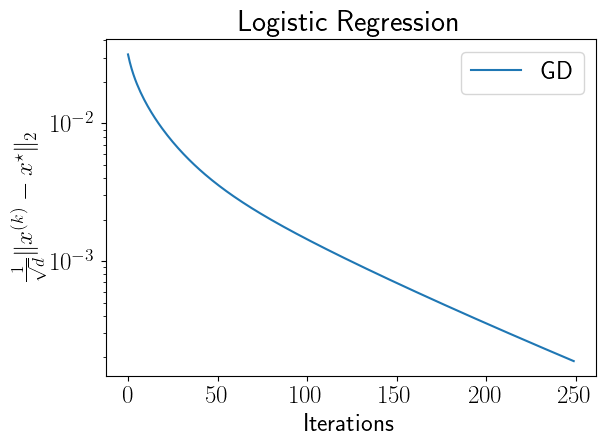

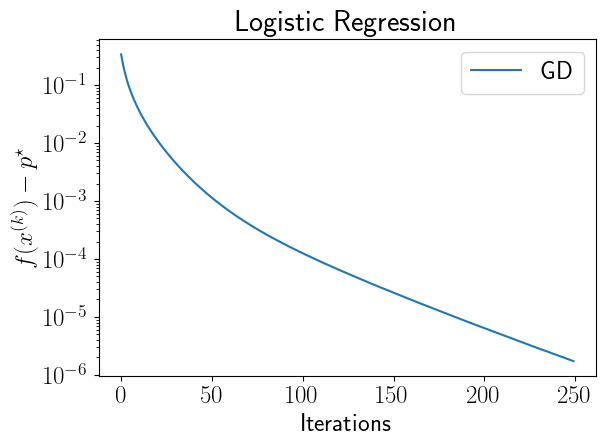

The function took 16.050 seconds to run.


In [2]:
args = args_parser()
args.optimizer = 'GD'

gd_execution_time = run_specified_method(args)

Yukarıdan görüldüğü gibi Gradient Descent yöntemi ile;
* 250 iterasyon sonucunda 0.1 learning rate ile **99.905% doğruluk** elde edilmiştir.
* Her çalıştırmada küçük miktarlarda farklılık gösterse de yöntemin **tamamlanması 16 saniye civarında** sürmüştür.

## Modified Newton Method

is_armijo_stepsize_active: False
lr: 0.1
optimizer: MN
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:11:52.087Z] learning rate: 0.1
[INFO] [2024-05-23T00:11:52.087Z] Optimizer: MN
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:12:04.314Z] ------------ Initial ------------
[INFO] [2024-05-23T00:12:04.314Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:12:04.315Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:12:04.409Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:12:04.411Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:12:05.161Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:12:05.162Z] weight error: 9.9234e-01
[INFO] [2024-05-23T00:12:05.162Z] objective error: 5.0380e-01
[INFO] [2024-05-23T00:13:22.859Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:13:22.859Z] weight error: 2.2479e-02
[INFO] [2024-05-23T

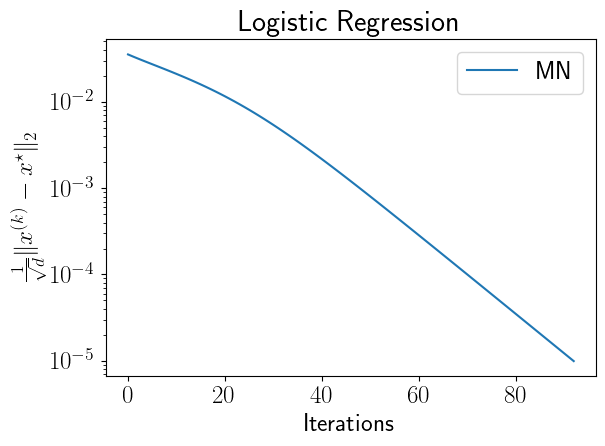

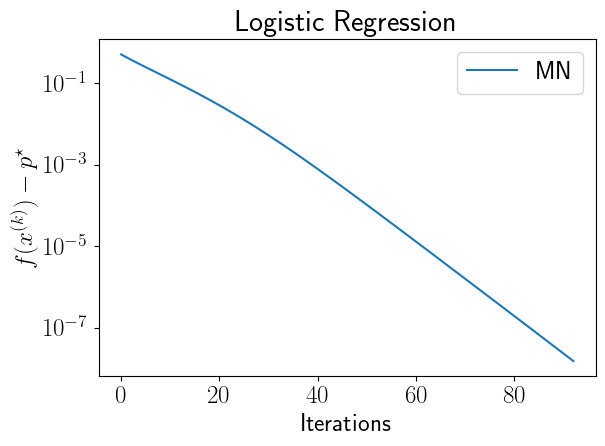

The function took 156.739 seconds to run.


In [3]:
args.optimizer = 'MN'

mn_execution_time = run_specified_method(args)

Yukarıdan görüldüğü gibi Modified Newton yöntemi ile;
* 93 iterasyon sonucunda 0.1 learning rate ile **99.905% doğruluk** elde edilmiştir.
* Her çalıştırmada küçük miktarlarda farklılık gösterse de yöntemin **tamamlanması 156 saniye civarında** sürmüştür.
* Gradient Descent yöntemine göre daha az iterasyon fakat daha fazla süre almıştır.
* Sürenin daha fazla olmasının sebebi, hesaplamada **hessian matrisinin hesaplanması ve bunun tersinin** alınmasıdır.

## Conjugate Gradient Method

is_armijo_stepsize_active: False
lr: 0.1
optimizer: CG
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:14:38.184Z] learning rate: 0.1
[INFO] [2024-05-23T00:14:38.184Z] Optimizer: CG
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:14:50.703Z] ------------ Initial ------------
[INFO] [2024-05-23T00:14:50.704Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:14:50.705Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:14:50.809Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:14:50.810Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:14:50.819Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:14:50.820Z] weight error: 6.8070e-01
[INFO] [2024-05-23T00:14:50.820Z] objective error: 1.5870e-01
[INFO] [2024-05-23T00:14:51.140Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:14:51.141Z] weight error: 1.9442e-02
[INFO] [2024-05-23T

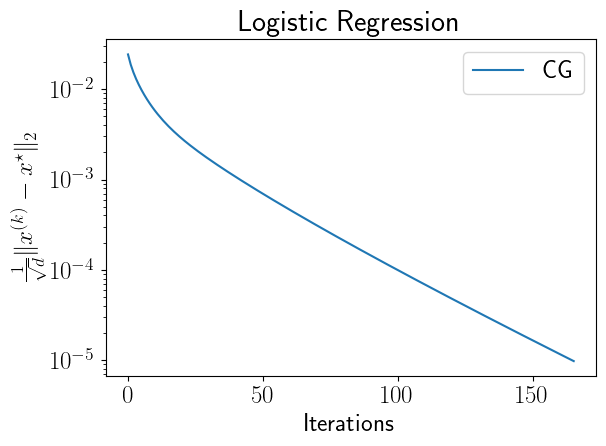

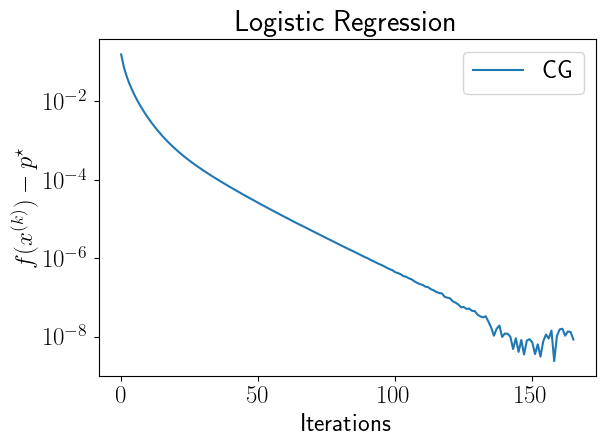

The function took 14.604 seconds to run.


In [4]:
args.optimizer = "CG"

cg_execution_time = run_specified_method(args)

Yukarıdan görüldüğü gibi Conjugate Gradient yöntemi ile;
* 166 iterasyon sonucunda 0.1 learning rate ile **99.905% doğruluk** elde edilmiştir.
* Her çalıştırmada küçük miktarlarda farklılık gösterse de yöntemin **tamamlanması 14 saniye civarında** sürmüştür.
* **Gradient Descent** yöntemine göre daha **az iterasyon** ile fakat **benzer sürelerde** tamamlanmıştır.

## Levenberg-Marquardt Method

is_armijo_stepsize_active: False
lr: 0.1
optimizer: LM
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:15:02.158Z] learning rate: 0.1
[INFO] [2024-05-23T00:15:02.158Z] Optimizer: LM
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:15:14.857Z] ------------ Initial ------------
[INFO] [2024-05-23T00:15:14.858Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:15:14.858Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:15:14.967Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:15:14.967Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:15:15.696Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:15:15.698Z] weight error: 9.9588e-01
[INFO] [2024-05-23T00:15:15.698Z] objective error: 5.0687e-01
[INFO] [2024-05-23T00:16:33.225Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:16:33.225Z] weight error: 3.9848e-02
[INFO] [2024-05-23T

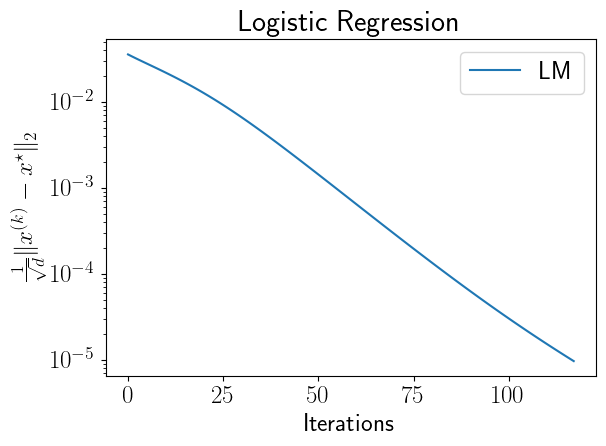

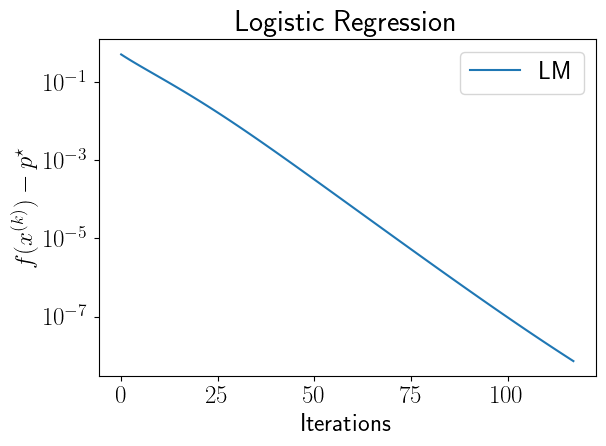

The function took 217.516 seconds to run.


In [5]:
args.optimizer = "LM"

lm_execution_time = run_specified_method(args)

Yukarıdan görüldüğü gibi Levemberg-Marquardt yöntemi ile;
* 118 iterasyon sonucunda 0.1 learning rate ile **99.905% doğruluk** elde edilmiştir.
* Her çalıştırmada küçük miktarlarda farklılık gösterse de yöntemin **tamamlanması 217 saniye civarında** sürmüştür.
* Gradient Descent yöntemine göre daha az iterasyon fakat daha fazla süre almıştır.
* Sürenin daha fazla olmasının sebebi, hesaplamada **hessian matrisinin hesaplanması ve bunun tersinin** alınmasıdır.

## BFGS (Broyden-Fletcher-Goldfarb-Shanno) Method

is_armijo_stepsize_active: False
lr: 0.1
optimizer: BFGS
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:18:49.116Z] learning rate: 0.1
[INFO] [2024-05-23T00:18:49.116Z] Optimizer: BFGS
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:19:03.272Z] ------------ Initial ------------
[INFO] [2024-05-23T00:19:03.273Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:19:03.273Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:19:03.461Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:19:03.462Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:19:04.276Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:19:04.277Z] weight error: 9.9234e-01
[INFO] [2024-05-23T00:19:04.277Z] objective error: 5.0380e-01
[INFO] [2024-05-23T00:20:36.588Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:20:36.589Z] weight error: 2.2479e-02
[INFO] [2024-05

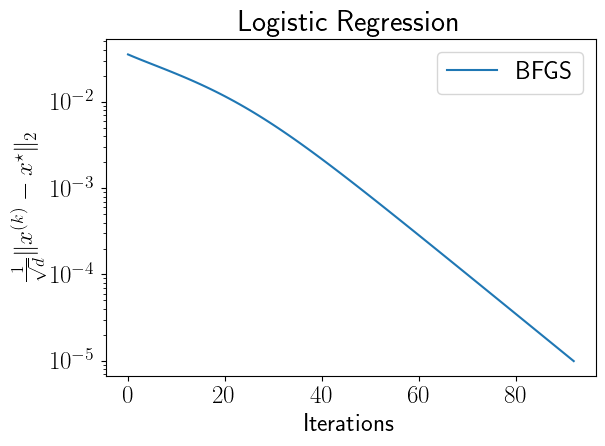

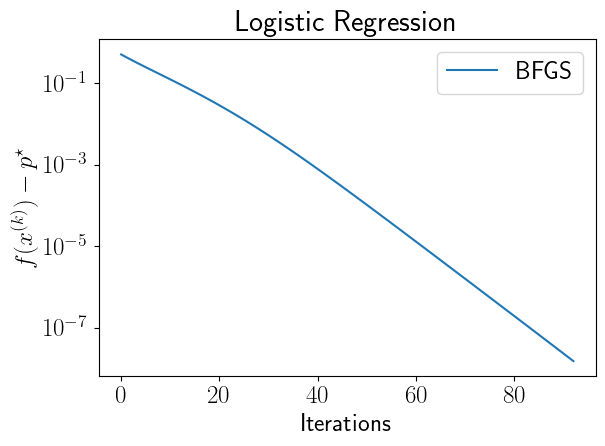

The function took 184.890 seconds to run.


In [6]:
args.optimizer = "BFGS"

bfgs_execution_time = run_specified_method(args)

Yukarıdan görüldüğü gibi BFGS yöntemi ile;
* 93 iterasyon sonucunda 0.1 learning rate ile **99.905% doğruluk** elde edilmiştir.
* Her çalıştırmada küçük miktarlarda farklılık gösterse de yöntemin **tamamlanması 184 saniye civarında** sürmüştür.
* Gradient Descent yöntemine göre daha az iterasyon fakat daha fazla süre almıştır.
* Sürenin daha fazla olmasının sebebi, hesaplamada **hessian matrisinin hesaplanması ve bunun tersinin** alınmasıdır.
* Modified Newton ile aynı iterasyon sayısında sonlanıyor. Bu nedenle algoritmada bir problem olduğunu düşünüyorum. Fakat bulamadım.

## Ortak Çizim ve Karşılaştırma

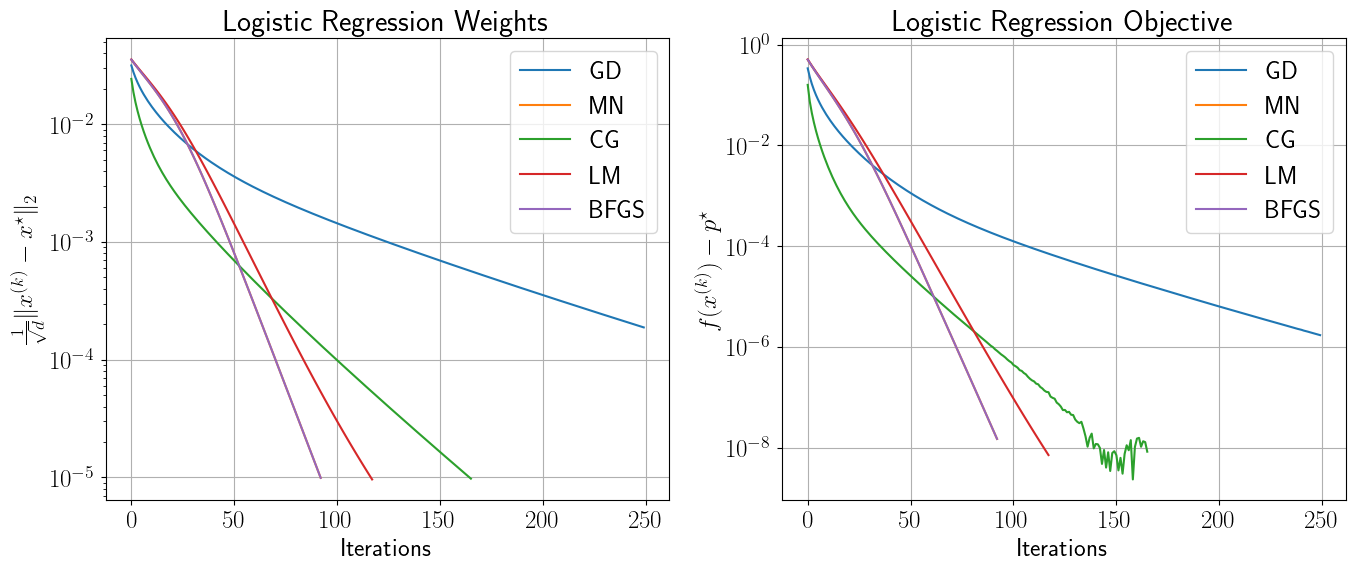

In [7]:
plot.plot_all_optimizer()

* Modified Newton ile BFGS aynı iterasyon sayısında sonlandığı için bir problem olduğunu düşünüyorum. Fakat bulamadım.
* En az iterasyonu Modified Newton da görüyoruz.

### Zaman Karşılaştırması

Çizimler için kullanılan kod aşağıdaki gibidir.

In [8]:
import matplotlib.pyplot as plt


def plot_time_results(times_in_seconds, optimizers, is_armijo_stepsize_active=False):

    for idx in range(len(times_in_seconds)):
        if is_armijo_stepsize_active:
            print(f"{optimizers[idx]} with Armijo Step Size: {times_in_seconds[idx]:.3f} sec")
        else:
            print(f"{optimizers[idx]}: {times_in_seconds[idx]:.3f} sec")

    # Create a bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.bar(range(len(times_in_seconds)), times_in_seconds)

    # Add titles to the bars
    for bar, optimizer in zip(bars, optimizers):
        time_value = bar.get_height()

        # ha: horizontal alignment
        text_x_location = bar.get_x() + bar.get_width() / 2.0
        text_y_location = time_value + 2

        time_value = f"{time_value:.3f}"
        plt.text(text_x_location, text_y_location, time_value, ha='center')

    # add the optimizer names to the x-axis
    plt.xticks(range(len(times_in_seconds)), optimizers)
    plt.xlabel('Methods')
    plt.ylabel('Times (second)')

    if is_armijo_stepsize_active:
        plt.title('Optimizers Execution Time Comparison with Armijo Step Size')
    else:
        plt.title('Optimizers Execution Time Comparison')

    plt.show()

Çizdirmek gerekirse;

GD: 16.050 sec
MN: 156.739 sec
CG: 14.604 sec
LM: 217.516 sec
BFGS: 184.890 sec


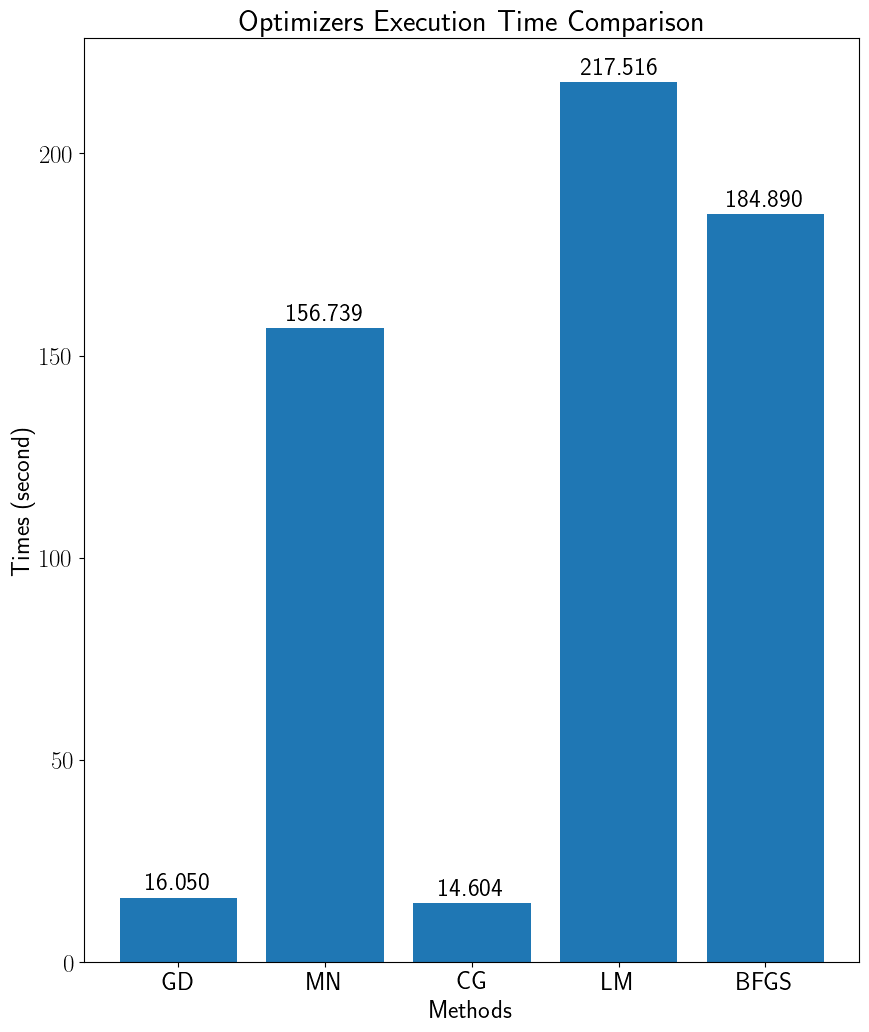

In [9]:
times_in_seconds = [gd_execution_time, mn_execution_time, cg_execution_time, lm_execution_time, bfgs_execution_time]
optimizers = ['GD', 'MN', 'CG', 'LM', 'BFGS']

plot_time_results(times_in_seconds, optimizers)

Sonuçları yorumlamak gerekirse;
* En iyi sonuçlar Gradient Descent ve Conjugate Gradient yöntemlerinde alınmıştır.

---------------------------
# Soru 4
Armijo stepsize search ile değişken olarak belirlenen öğrenme oranı kullanarak Gradyen Azalım, Modifiye Edilmiş Newton ve Conjugate Gradyen yöntemlerini karşılaştırınız. Değişken olarak belirlenen öğrenme oranı sabit duruma göre nasıl bir katkı sağlamıştır?

## Gradient Descent Method with Armijo Step Size Search

is_armijo_stepsize_active: True
lr: 0.1
optimizer: GD
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:22:11.636Z] learning rate: 0.1
[INFO] [2024-05-23T00:22:11.636Z] Optimizer: GD
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:22:26.175Z] ------------ Initial ------------
[INFO] [2024-05-23T00:22:26.176Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:22:26.176Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:22:26.380Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:22:26.381Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:22:26.411Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:22:26.411Z] weight error: 4.0266e-01
[INFO] [2024-05-23T00:22:26.412Z] objective error: 6.8044e-02
[INFO] [2024-05-23T00:22:49.616Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:22:49.617Z] weight error: 4.0266e-01
[INFO] [2024-05-23T0

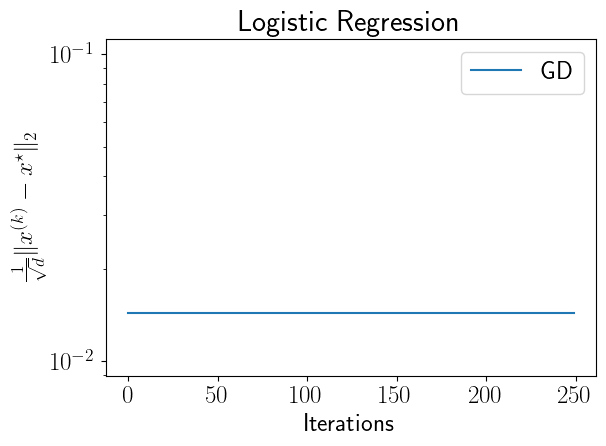

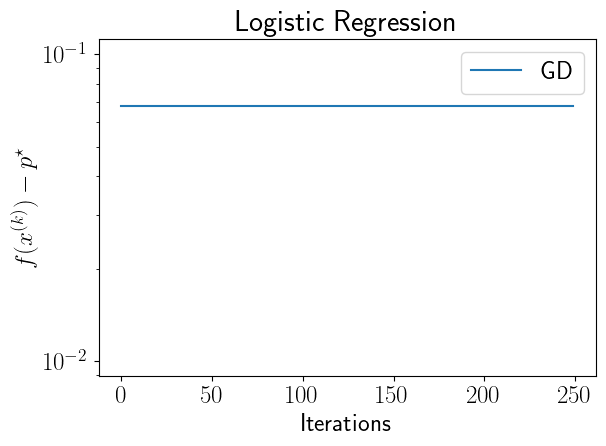

The function took 130.907 seconds to run.


In [10]:
args = args_parser()
args.is_armijo_stepsize_active = True
args.optimizer = 'GD'

gd_with_armijo_execution_time = run_specified_method(args)

Armijo stepsize search ile Gradient Descent yöntemi ile;
* 250 iterasyon sayısının azalmadığını gözlemledik.
* Accuracy %99.257 olarak gerçekleşmiştir ve aslında azalmıştır.
* Normal GD 14 saniye iken, armijo 130 saniyeye yükselmiştir.
* Burada armijo nun herhangi bir faydası görülmemiştir.


## Modified Newton Method with Armijo Step Size Search

is_armijo_stepsize_active: True
lr: 0.1
optimizer: MN
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:24:31.532Z] learning rate: 0.1
[INFO] [2024-05-23T00:24:31.532Z] Optimizer: MN
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:24:44.451Z] ------------ Initial ------------
[INFO] [2024-05-23T00:24:44.459Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:24:44.461Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:24:44.573Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:24:44.579Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:24:45.454Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:24:45.455Z] weight error: 7.6260e-01
[INFO] [2024-05-23T00:24:45.456Z] objective error: 2.4433e-01
[INFO] [2024-05-23T00:25:10.017Z] ------------ Iteration 16 ------------
[INFO] [2024-05-23T00:25:10.018Z] weight error: 1.7173e-04
[INFO] [2024-05-23T0

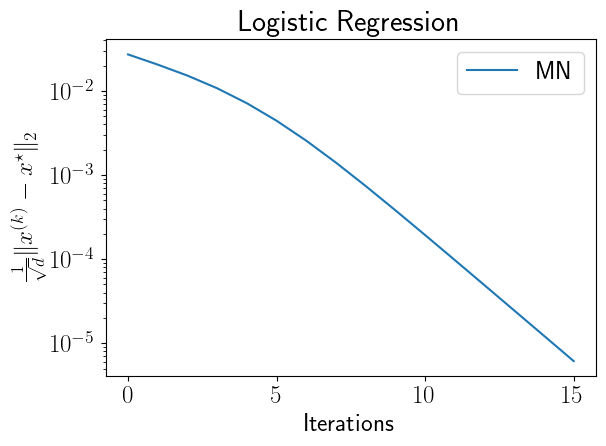

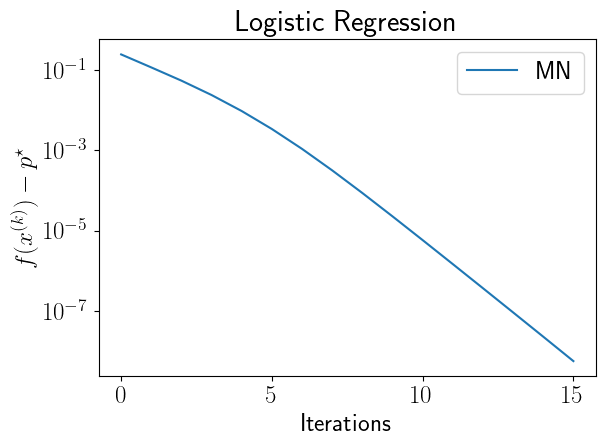

The function took 39.314 seconds to run.


In [11]:
args = args_parser()
args.is_armijo_stepsize_active = True
args.optimizer = 'MN'

mn_with_armijo_execution_time = run_specified_method(args)

Armijo stepsize search ile Modified Newton yöntemi ile;
* 93 iterasyon yerine 16 iterasyonda sonlanmıştır.
* Normal MD 223 saniye iken armijo 43.24 saniye sürmüştür.
* Armijo nun etkisiyle iterasyon sayısında azalma ve sürede azalma gözlemlenmiştir.

## Conjugate Gradient Method with Armijo Step Size Search

is_armijo_stepsize_active: True
lr: 0.1
optimizer: CG
iteration: 250
gamma: 0.1
     training dataset:  (12665, 785)
     testing dataset:  (2115, 785)
[INFO] [2024-05-23T00:25:20.213Z] learning rate: 0.1
[INFO] [2024-05-23T00:25:20.213Z] Optimizer: CG
============= CVX solving =============
============= CVX solved =============
[INFO] [2024-05-23T00:25:33.188Z] ------------ Initial ------------
[INFO] [2024-05-23T00:25:33.189Z] weight error: 1.0509e+00
[INFO] [2024-05-23T00:25:33.189Z] objective error: 5.9037e-01
[INFO] [2024-05-23T00:25:33.290Z] max eigenvalue of Hessian:9.8267
[INFO] [2024-05-23T00:25:33.290Z] min eigenvalue of Hessian:0.1000
[INFO] [2024-05-23T00:25:33.324Z] ------------ Iteration 1 ------------
[INFO] [2024-05-23T00:25:33.324Z] weight error: 3.2117e-01
[INFO] [2024-05-23T00:25:33.325Z] objective error: 1.4117e-02
[INFO] [2024-05-23T00:25:57.244Z] ------------ Iteration 51 ------------
[INFO] [2024-05-23T00:25:57.248Z] weight error: 3.2117e-01
[INFO] [2024-05-23T0

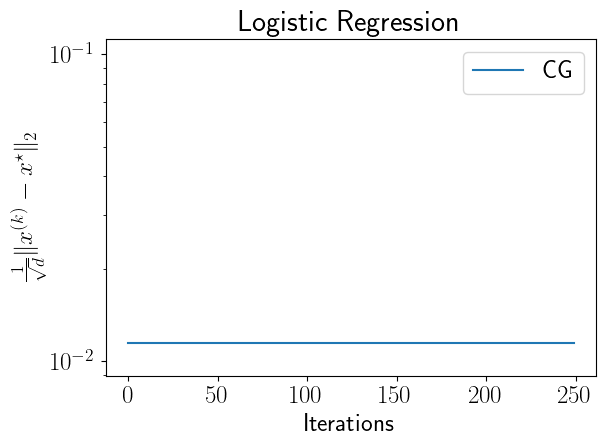

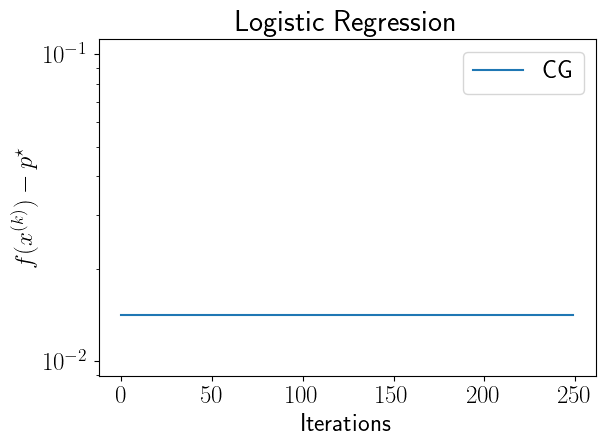

The function took 133.559 seconds to run.


In [12]:
args = args_parser()
args.is_armijo_stepsize_active = True
args.optimizer = 'CG'

cg_with_armijo_execution_time = run_specified_method(args)

Armijo stepsize search ile Conjugate Gradient yöntemi ile;
* 166 iterasyon, 250 ye kadar çıkmıştır.
* Accuracy %99.811 olarak gerçekleşmiştir ve azalmıştır.
* 25 saniye civarından 135 saniye ye yükselmiştir.
* Armijo nun herhangi bir faydası görülmemiştir.

## Zaman Karşılaştırması

GD with Armijo Step Size: 130.907 sec
MN with Armijo Step Size: 39.314 sec
CG with Armijo Step Size: 133.559 sec


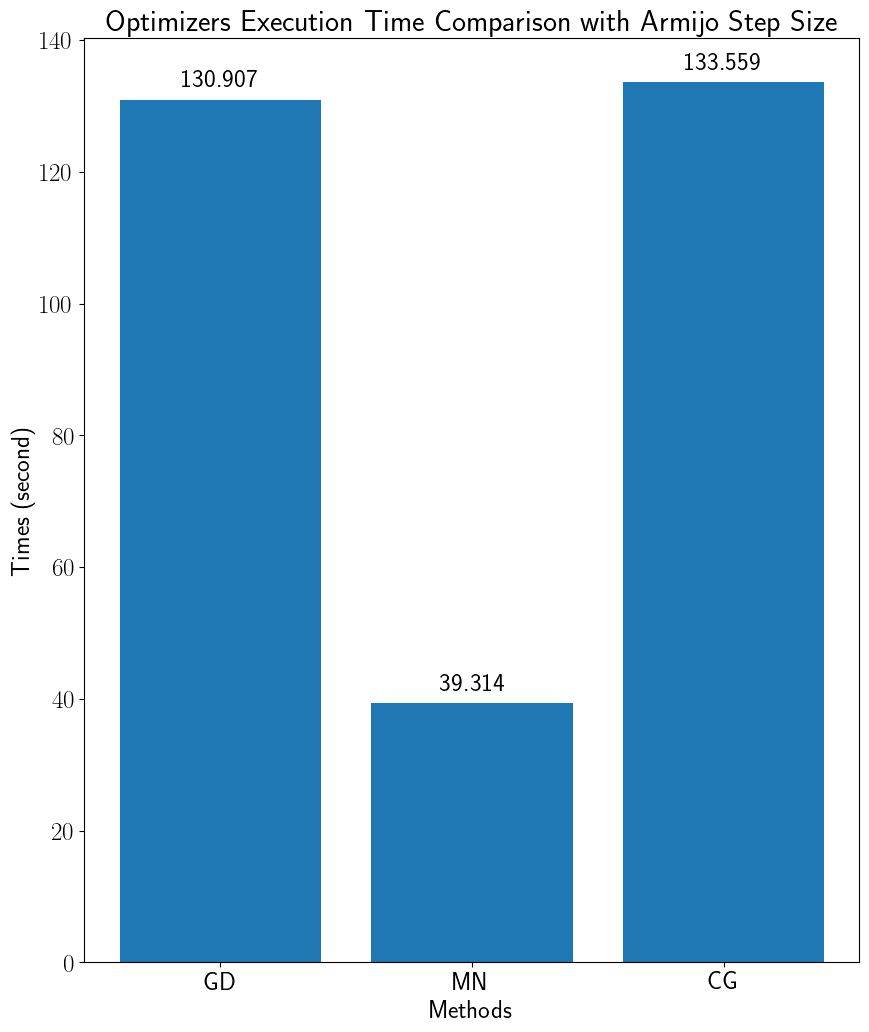

In [13]:
times_in_seconds = [gd_with_armijo_execution_time, mn_with_armijo_execution_time, cg_with_armijo_execution_time]
optimizers = ['GD', 'MN', 'CG']

plot_time_results(times_in_seconds, optimizers, is_armijo_stepsize_active=True)

Yorumlamak gerekirse;
* Armijo stepsize search yöntemi, Modified Newton yönteminde en iyi sonuçları vermiştir.